Important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading csv file

In [2]:
df = pd.read_csv(r'customer_acquisition_data.csv')
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [4]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [5]:
df.shape

(800, 5)

Text(0, 0.5, 'Frequency')

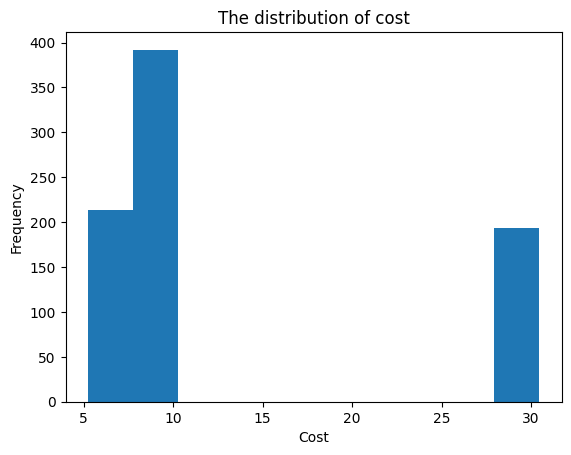

In [23]:
plt.hist(df['cost'])
plt.title('The distribution of cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

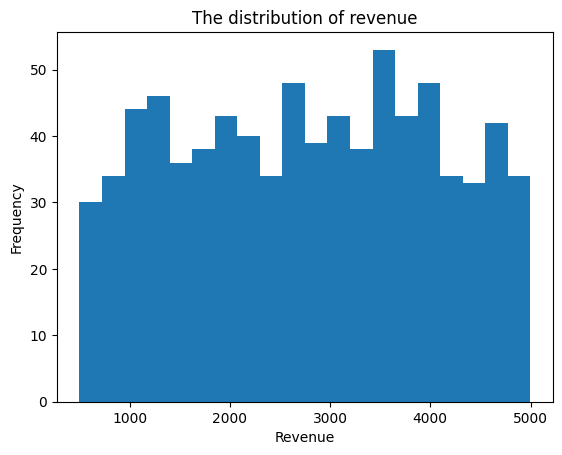

In [13]:
plt.hist(df['revenue'], bins=20)
plt.title('The distribution of revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average Cost')

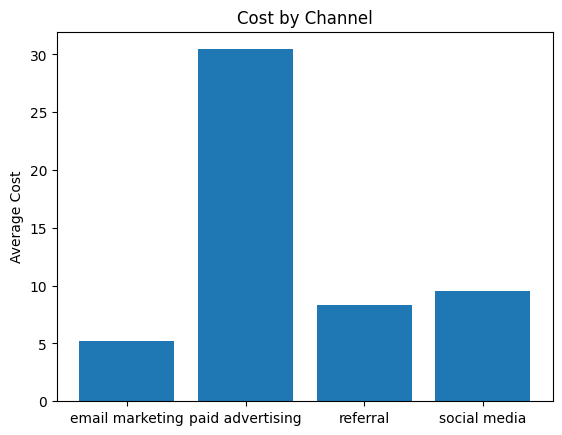

In [36]:
cost_by_channel =df['cost'].groupby(df['channel']).median().reset_index()
plt.bar(cost_by_channel['channel'], cost_by_channel['cost'])
plt.title('Cost by Channel')
plt.ylabel('Average Cost')

**Paid advertising** is the most expensive channel, and **email marketing** is the least expensive channel.

Now let's analyze the performance of channels based on conversion rate.

Text(0, 0.5, 'Conversion Rate')

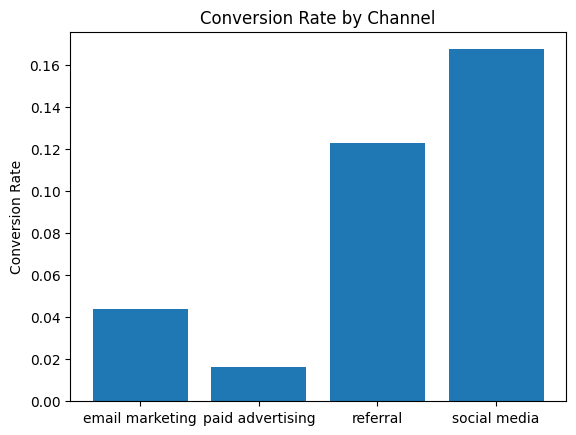

In [40]:
conv_rate_by_channel = df.groupby('channel')['conversion_rate'].mean().reset_index()
plt.bar(conv_rate_by_channel['channel'], conv_rate_by_channel['conversion_rate'])
plt.title('Conversion Rate by Channel')
plt.ylabel('Conversion Rate')

**Social media** is the most effective channel for converting customers, while **paid advertising** is the least performing channel.

Now we will look at the performance of channels based on revenue.

Text(0.5, 1.0, 'Total Revenue by Channel')

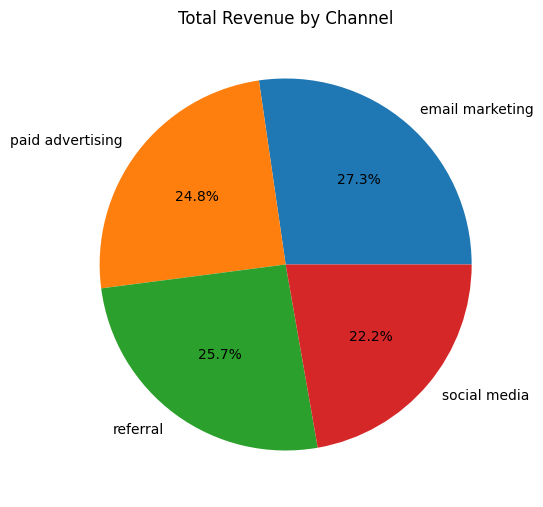

In [58]:
revenue_by_channel=df.groupby('channel')['revenue'].sum().reset_index()
plt.figure(figsize=(6,8))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%')
plt.title('Total Revenue by Channel')

Return on Investment(ROI) Analysis. ROI = revenue / cost

Text(0, 0.5, 'ROI(Return On Investment)')

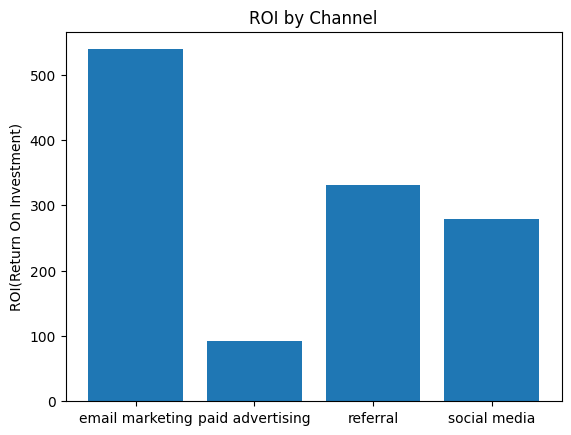

In [62]:
df['roi'] = df['revenue'] / df['cost']
roi_by_channel = df.groupby('channel')['roi'].mean().reset_index()
plt.bar(roi_by_channel['channel'], roi_by_channel['roi'])
plt.title('ROI by Channel')
plt.ylabel('ROI(Return On Investment)')

We can see that the ROI from email marketing is way higher than others, while the ROI from paid advertising is the lowest.This indicates that email marketing provides greater benefits compared to other channels.

Now let's calculate the customer lifetime value

Text(0, 0.5, 'CLV')

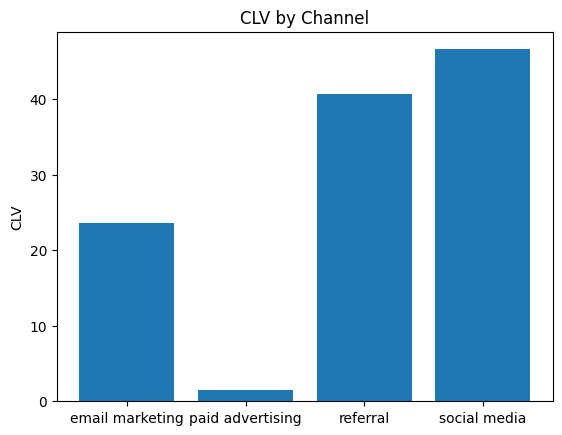

In [66]:
df['clv'] = (df['revenue'] - df['cost']) * df['conversion_rate'] / df['cost']
clv_by_channel = df.groupby('channel')['clv'].mean().reset_index()
plt.bar(clv_by_channel['channel'], clv_by_channel['clv'])
plt.title('CLV by Channel')
plt.ylabel('CLV')

Social media and referral have much higher customer lifetime value. Now let's compare the clv distributions of these two channels.

C:\Users\zeyne\AppData\Local\Temp\ipykernel_3112\768152652.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([subset.loc[subset['channel'] == ch, 'clv'] for ch in subset['channel'].unique()], labels=subset['channel'].unique())


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5c2da60d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5c2da7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5c2da59d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c5c2dbc390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c5c2dbcb90>,
 'means': []}

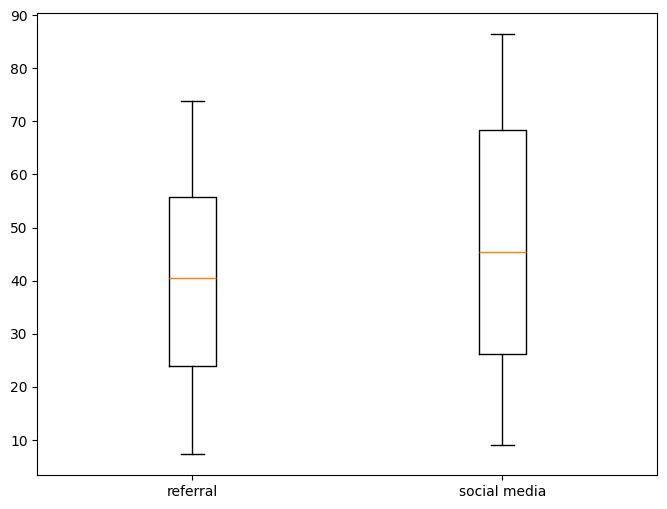

In [77]:
subset = df.loc[df['channel'].isin(['social media', 'referral'])]
plt.figure(figsize=(8,6))
plt.boxplot([subset.loc[subset['channel'] == ch, 'clv'] for ch in subset['channel'].unique()], labels=subset['channel'].unique())

The distributions show that CLV from social media is slightly better than referral.